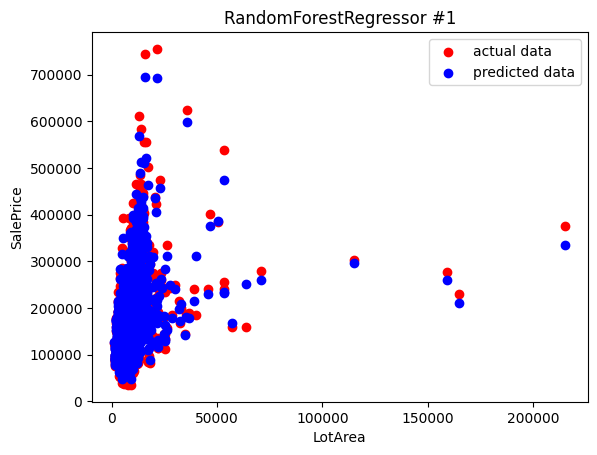

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.impute import SimpleImputer
numeric_features_names = ['KitchenAbvGr', 'SaleType_Oth', 'HeatingQC_TA', 'SaleCondition_Family', 'Condition1_Feedr', 'BsmtFinType2_Rec', 'MSZoning_RM', 'HouseStyle_SLvl', 'MSZoning_RH', 'Condition2_Feedr', 'RoofStyle_Shed', 'ExterQual_Gd', 'GarageCars', 'FullBath', 'LotShape_IR3', 'BsmtExposure_Mn', 'FireplaceQu_TA', 'KitchenQual_Gd', 'LotConfig_FR3', 'GarageCond_Po', 'GarageArea', 'BsmtFinType2_Unf', 'Electrical_Mix', 'PavedDrive_P', 'Functional_Sev', 'GarageQual_Po', '1stFlrSF', 'BsmtQual_Fa', 'GrLivArea', 'ExterCond_Po', 'BsmtQual_Gd', 'BsmtCond_Po', 'OverallQual', 'KitchenQual_Fa', 'Fireplaces', 'LandContour_Low', 'TotalBsmtSF', 'OverallCond', 'Foundation_CBlock', 'YearBuilt', 'TotRmsAbvGrd', 'ExterCond_TA', 'ExterQual_Fa', 'GarageFinish_RFn', 'MSSubClass', 'YearRemodAdd', 'HalfBath', 'HouseStyle_1.5Unf', 'BedroomAbvGr', 'MoSold', 'BsmtFullBath', 'LotArea', 'Exterior2nd_Wd Shng', 'HouseStyle_2.5Unf', '2ndFlrSF', 'Exterior1st_Stucco', 'GarageType_Detchd', 'BsmtFinType1_BLQ', 'HeatingQC_Po', 'GarageType_CarPort', 'BsmtFinSF1', 'Exterior2nd_Stucco', 'BsmtUnfSF', 'YrSold', 'FireplaceQu_Po']
houses_train = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')
houses_train = pd.get_dummies(houses_train)
houses_test = pd.get_dummies(houses_test)
houses_test = houses_test.reindex(columns = houses_train.columns, fill_value=0)
numeric_features = houses_train[numeric_features_names]
sale_price = houses_train['SalePrice']
from sklearn.ensemble import RandomForestRegressor
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(numeric_features)
X_train_imp = imp.transform(numeric_features)
clf = RandomForestRegressor(random_state=0)
clf.fit(X_train_imp, houses_train['SalePrice'])
import matplotlib.pyplot as plt
Y_predict = clf.predict(X_train_imp)
plt.scatter(numeric_features.LotArea, sale_price, color='red', label='actual data')
plt.scatter(numeric_features.LotArea, Y_predict, color='blue', label='predicted data')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('RandomForestRegressor #1')
plt.legend()

In [2]:
X_test = imp.transform(houses_test[numeric_features_names])
Y_test_predict = clf.predict(X_test)
arr = np.concatenate((np.array(houses_test['Id']).reshape(-1, 1), Y_test_predict.reshape(-1, 1)), axis=1)
np.savetxt("submission10.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')